In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\MISc\data\Housing assignmentbyHarshith.csv")

In [3]:
df.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [4]:
df.info()# To see the overall view of datatypes of different columns in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.shape# to see the size of the data

(545, 13)

In [6]:
df.columns#to see the name of the columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
df.isnull().sum()# to confirm there is no null values in the data

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# one method-To seggregate the categorical columns and numerical columns
# use nunique method to count the number of options and if it is below 5, we can consider it as cat column
catcols=[]
for i in df.columns:
    if df[i].nunique()<4:
        catcols.append(i)

In [9]:
catcols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [10]:
# second method-To seggregate the categorical columns and numerical columns
#used dtype method to seggregate the objects and categorize the categorical columns

In [11]:
catcols1=[]
for i in df.columns:
    if df[i].dtype=="O":
        catcols1.append(i)

In [12]:
catcols1

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [13]:
#Now we have to apply LabelEncoding to categories columns

In [14]:
le=LabelEncoder()

In [15]:
for i in catcols:
    df[i]=le.fit_transform(df[i])

In [16]:
# after encoding we can see the changes while running below code.
encoded=[]
for i in df.columns:
    if df[i].nunique() <4:
        encoded.append((df[i].value_counts()))
encoded

[1    468
 0     77
 Name: mainroad, dtype: int64,
 0    448
 1     97
 Name: guestroom, dtype: int64,
 0    354
 1    191
 Name: basement, dtype: int64,
 0    520
 1     25
 Name: hotwaterheating, dtype: int64,
 0    373
 1    172
 Name: airconditioning, dtype: int64,
 0    417
 1    128
 Name: prefarea, dtype: int64,
 1    227
 2    178
 0    140
 Name: furnishingstatus, dtype: int64]

In [17]:
# now we will see the data after encoding the categorical columns
df.head(6)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1


<Figure size 800x500 with 0 Axes>

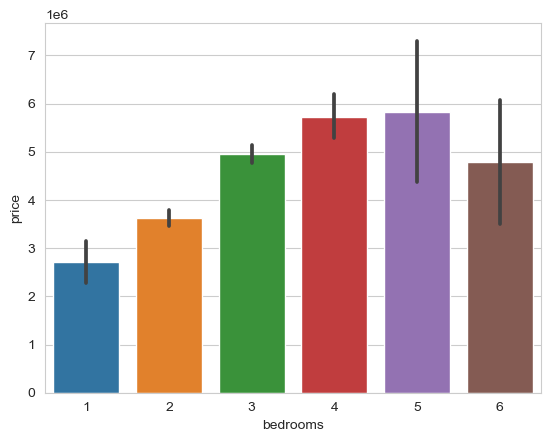

<Figure size 800x500 with 0 Axes>

In [242]:
sns.barplot(data = df, x = 'bedrooms', y = 'price')
plt.figure(figsize=(8,5))

In [94]:
df["area"].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

<Figure size 800x500 with 0 Axes>

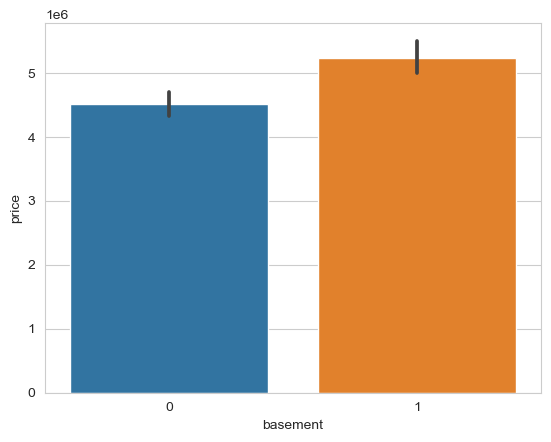

<Figure size 800x500 with 0 Axes>

In [243]:
sns.barplot(data = df, x = 'basement', y = 'price')
plt.figure(figsize=(8,5))

<Axes: xlabel='furnishingstatus', ylabel='price'>

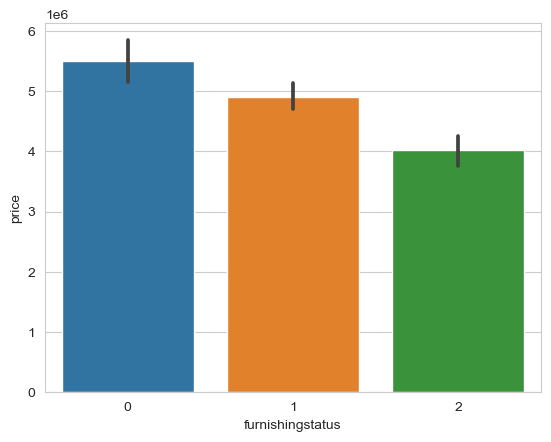

In [244]:
sns.barplot(data = df, x = 'furnishingstatus', y = 'price')

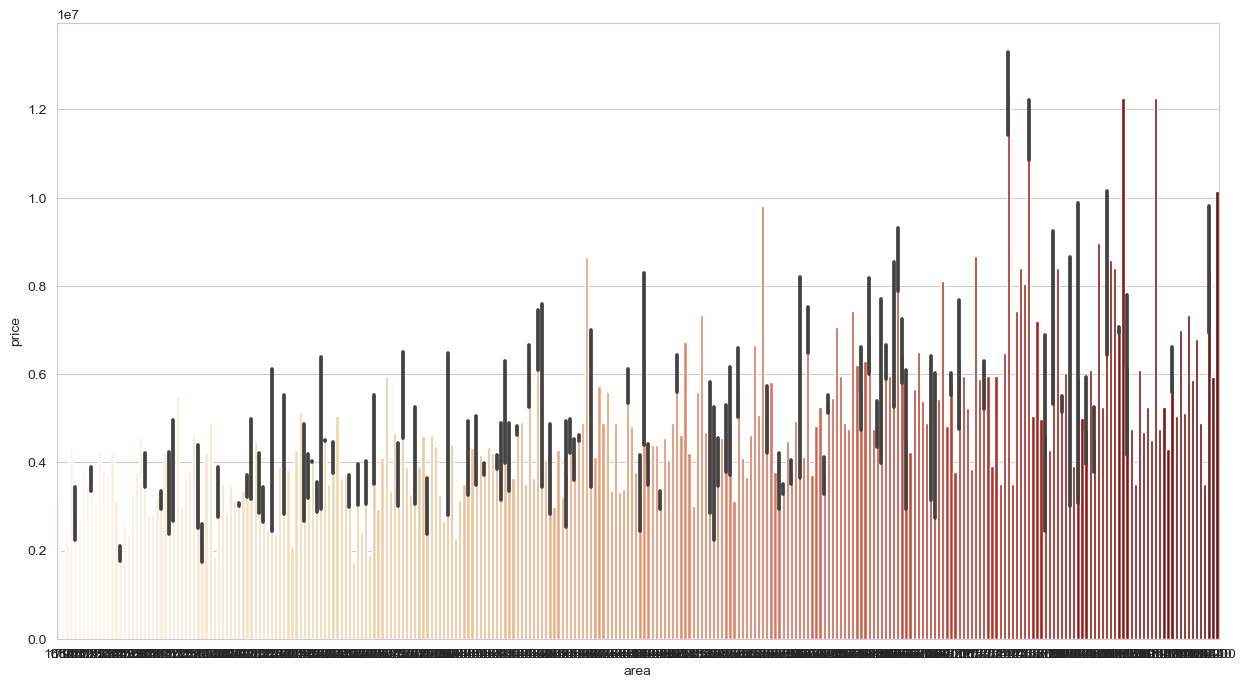

In [245]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df, x = 'area', y = 'price', palette = "OrRd")
plt.show()

In [246]:
area_bins = [0, 3000, 6000, 9000, 12000, 16000]
area_labels = ['0-3000','3000-60000','6000-9000','9000-12000','12000-16000']

df['area_range'] = pd.cut(df['area'], bins = area_bins, labels= area_labels, right = False)

In [247]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_range
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,6000-9000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,6000-9000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,9000-12000
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,6000-9000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,6000-9000


<Axes: xlabel='area_range', ylabel='price'>

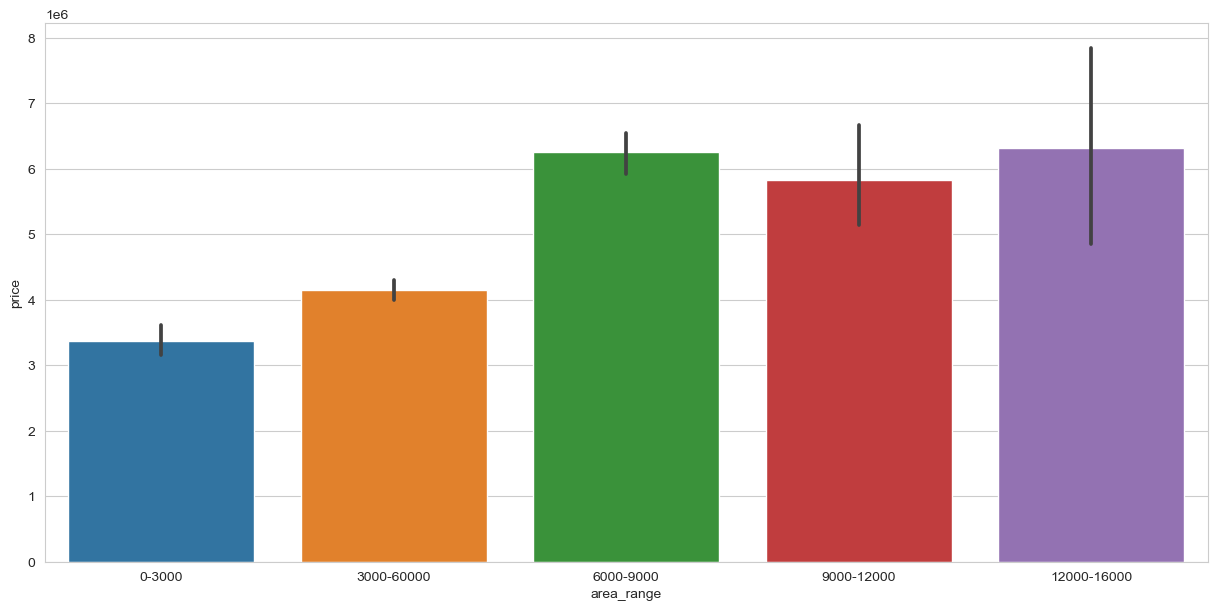

In [248]:

plt.figure(figsize = (15, 7))
sns.barplot(data = df, x = 'area_range', y = 'price')

<Axes: xlabel='area_range', ylabel='count'>

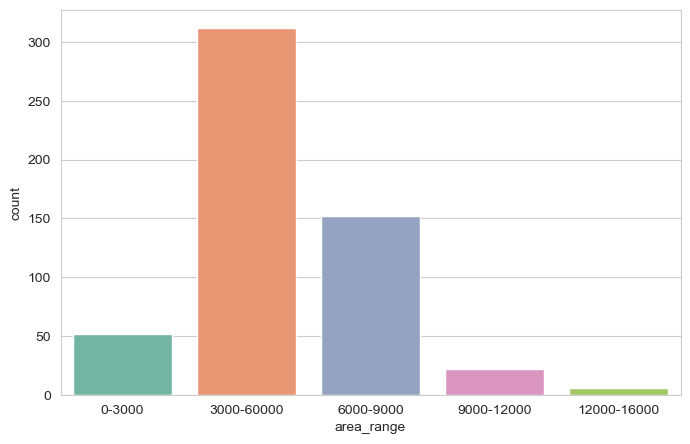

In [249]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'area_range', palette = 'Set2')

In [250]:
corr = df.corr(numeric_only = True)
corr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


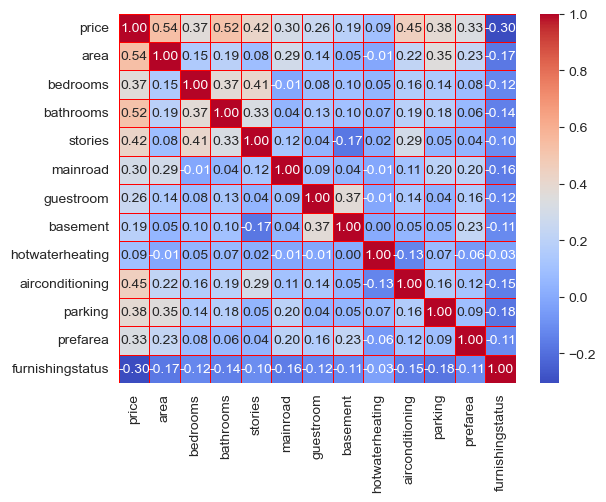

In [251]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linecolor = 'red', linewidths = 0.5, fmt = '.2f')
plt.show()

# Machine Learning Part

In [253]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'area_range'],
      dtype='object')

In [18]:
x=df.iloc[:,1:13]
y=df.iloc[:,0]

In [257]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [258]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [259]:
#split the data into train and test, 80% for training and 20 testing the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [260]:
#
df = pd.merge(x_test, y_test, how = 'inner', left_index = True, right_index = True)

In [264]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
316,5900,4,2,2,0,0,1,0,0,1,0,2,4060000
77,6500,3,2,3,1,0,0,0,1,0,1,0,6650000
360,4040,2,1,1,1,0,0,0,0,0,0,1,3710000
90,5000,3,1,2,1,0,0,0,1,0,0,1,6440000
493,3960,3,1,1,1,0,0,0,0,0,0,0,2800000


In [265]:
#model 1 XGBRegressor used to predict the values
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [266]:
y_pred = xgb.predict(x_test)

In [267]:
y_pred

array([ 4894797. ,  8035821.5,  3724608.2,  4653137.5,  3987121.8,
        3209830.8,  6163704.5,  4582449.5,  2770548.8,  3037113.5,
       10720632. ,  3962847.2,  3020387. ,  3171027.8,  3005562.2,
        3734755.8,  3054045.8,  4666611.5,  3832069.5,  4463234.5,
        4992867. ,  6137479.5,  2947311.8,  4314808. ,  4351467.5,
        6755509. ,  2874303. ,  4163799.5,  6477209. ,  2991869.5,
        5941500. ,  3280491.5,  6864845. ,  4219617. ,  2854482.5,
        7589219. ,  4577365. ,  3435181.2,  2775126.8,  4242747. ,
        3738673.5,  3005448. ,  8031854.5,  3849443.8,  3730837.8,
        4136909.8,  6877214.5,  3956108. ,  2633213.5,  2915271.2,
        8485336. ,  2183929. ,  3841852.5,  4333973.5,  3400631.8,
        3184188.2,  5832058. ,  2608446.2,  4489449.5,  3106635.8,
        3400506.5,  4096774.5,  4705876.5,  3960120.8,  3461131.2,
        4606024. ,  6095535. ,  2852849.8,  5573997.5,  5442337. ,
        4102786.5,  5861886.5,  6134888. ,  7557800. ,  287150

In [268]:
df['Prediction'] = y_pred

In [269]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,Prediction
316,5900,4,2,2,0,0,1,0,0,1,0,2,4060000,4894797.00
77,6500,3,2,3,1,0,0,0,1,0,1,0,6650000,8035821.50
360,4040,2,1,1,1,0,0,0,0,0,0,1,3710000,3724608.25
90,5000,3,1,2,1,0,0,0,1,0,0,1,6440000,4653137.50
493,3960,3,1,1,1,0,0,0,0,0,0,0,2800000,3987121.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,1,0,1,0,0,2,0,1,9100000,7822859.00
357,6930,4,1,2,0,0,0,0,0,1,0,0,3773000,4421025.00
39,6000,4,2,4,1,0,0,0,1,1,0,1,7910000,7477171.50
54,6000,3,2,2,1,1,0,0,1,1,0,1,7350000,8159375.00


In [270]:
print(r2_score(y_test, y_pred))

0.5979075332022226


In [335]:
print(r2_score(y_test, y_pred1))

0.6576064227762792


In [336]:
print(r2_score(y_test, y_pred2))

0.6494754192267804


In [271]:
print(mean_absolute_error(y_test, y_pred))

1062315.9931192661


In [272]:
mae = mean_absolute_error(y_test, y_pred)
print('Average absolute error: ', '${:.2f}'.format(mae))

Average absolute error:  $1062315.99


In [310]:
param_grids = {
    'n_estimators': [300,700,800],#1)[100,300,500]2)[200,300,600][200,400,600]
    'learning_rate': [0.06, 0.08, 0.6],#[0.01, 0.05, 0.1]2)[0.02, 0.07, 0.2][0.04, 0.07, 0.4]
    'max_depth': [6,8,9,9]#[3,5,7,9],[2,5,8,6][4,6,8,9]
}

In [311]:
Grid = GridSearchCV(xgb, param_grids, cv = 10, scoring = 'neg_mean_squared_error')

In [312]:
Grid.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.04,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=4, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=200,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.06, 0.08, 0.6],
                         'max_depth': [6, 8, 9, 9],
                         'n_estimators': [300, 700, 800]},
             scoring='neg_mean_squared_error')

In [313]:
best_params = Grid.best_params_
best_score = np.abs(Grid.best_score_)

In [314]:
print(best_params)

{'learning_rate': 0.06, 'max_depth': 6, 'n_estimators': 300}


In [303]:
print(best_score)

1185129794712.4634


In [304]:
print(best_score)

1185129794712.4634


In [333]:
xgb = XGBRegressor(learning_rate = 0.04, n_estimators = 200, max_depth = 3)
xgb.fit(x_train, y_train)
y_pred1 = xgb.predict(x_test)
print(y_pred1)

[ 4397261.   7171904.5  3675458.2  4466104.   3666112.2  3963300.8
  6380226.   5711175.5  3237288.5  3083116.8 11475383.   2902922.5
  3202832.5  3491378.   3591181.5  3745570.8  3098188.5  5403010.5
  4345909.   4128916.2  5575965.   6099699.5  2842055.5  4149678.8
  4996823.   6926350.5  3536230.2  4613847.   6931512.5  3386302.
  5705090.5  3375042.8  6742162.   4294985.   3409119.2  6145089.5
  4691352.   3726499.8  3047852.5  4239754.   4581142.5  3111183.5
  7171904.5  4263719.   3968268.8  4105251.8  6833852.   4279303.5
  3688912.8  2995907.5  8312173.   2697403.2  4136821.8  4365751.
  3535532.   3109694.   7100731.   2920390.   4661418.5  2856746.
  3824833.   3550113.2  4618265.   4509396.5  4164472.5  5146057.
  6287603.5  3238429.2  5893424.   5595498.   3906377.   5361137.5
  4772496.   7904492.   3125350.5  5107108.5  3880573.8  4708036.5
  5257152.   4273750.   8210826.5  4295407.5  5590082.   5665905.5
  2892537.2  6583813.5  2849674.8  3925210.2  9268992.   9352125.


In [279]:
xgb = XGBRegressor(learning_rate = 0.07, n_estimators = 200, max_depth = 2)
xgb.fit(x_train, y_train)
y_pred1 = xgb.predict(x_test)
print(y_pred1)

[ 4638490.5  7215779.5  3644498.5  4562276.5  3602586.   3973925.2
  6078395.   5979421.5  3096568.8  3014477.8 11489662.   2960792.
  3189683.2  3557783.   3694434.2  3952907.   2957453.8  5438211.5
  4421765.   4232944.5  5428455.   5929519.5  2885634.   4520510.5
  5095902.5  6696311.5  3578577.   4618829.5  7112392.5  3402123.2
  5530004.5  3289346.2  6957955.5  4393531.5  3548553.   5866180.
  4763277.   3896646.2  2930945.2  4187066.   4830401.   3097078.5
  7215779.5  4359374.   4121887.8  4065391.   7241006.5  4298664.
  3705250.8  3221956.5  8309961.   2729475.2  4564091.   4466879.
  3671413.   3014477.8  6757010.   2764917.2  4419570.5  2933230.8
  4051699.8  3070340.8  5063165.5  4476438.5  4404701.   5148543.5
  6669495.   3330258.   5272693.5  5734502.5  3912533.5  5158918.5
  4705890.   7942736.5  3132378.5  5012909.5  3918649.2  4776445.
  5353613.5  4331387.5  8124828.   4299178.5  5698079.   5509816.
  2683364.8  7532155.5  2729405.8  3817776.8  9406804.   9884204.
  

In [280]:
df['Prediction-Optimized'] = xgb.predict(x_test)

df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,Prediction,Prediction-Optimized
316,5900,4,2,2,0,0,1,0,0,1,0,2,4060000,4894797.00,4638490.5
77,6500,3,2,3,1,0,0,0,1,0,1,0,6650000,8035821.50,7215779.5
360,4040,2,1,1,1,0,0,0,0,0,0,1,3710000,3724608.25,3644498.5
90,5000,3,1,2,1,0,0,0,1,0,0,1,6440000,4653137.50,4562276.5
493,3960,3,1,1,1,0,0,0,0,0,0,0,2800000,3987121.75,3602586.0


In [334]:
df['Prediction-Optimized4']=y_pred1
df.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,Prediction,Prediction-Optimized,LinRegPrediction,Prediction-Optimized2,Prediction-Optimized3,Prediction-Optimized4
316,5900,4,2,2,0,0,1,0,0,1,0,2,4060000,4894797.00,4638490.50,5.203692e+06,4588371.00,4291537.00,4397261.00
77,6500,3,2,3,1,0,0,0,1,0,1,0,6650000,8035821.50,7215779.50,7.257004e+06,7478252.00,7290723.50,7171904.50
360,4040,2,1,1,1,0,0,0,0,0,0,1,3710000,3724608.25,3644498.50,3.062829e+06,3673637.75,3707549.25,3675458.25
90,5000,3,1,2,1,0,0,0,1,0,0,1,6440000,4653137.50,4562276.50,4.559592e+06,4347873.50,4460977.00,4466104.00
493,3960,3,1,1,1,0,0,0,0,0,0,0,2800000,3987121.75,3602586.00,3.332932e+06,3925065.00,3747240.50,3666112.25
209,6720,3,1,1,1,0,0,0,0,0,0,2,4900000,3209830.75,3973925.25,3.563081e+06,3875212.25,3880825.00,3963300.75
176,8520,3,1,1,1,0,0,0,1,2,0,0,5250000,6163704.50,6078395.00,5.645466e+06,6499347.00,6652774.50,6380226.00
249,4990,4,2,2,1,1,1,0,0,0,1,0,4543000,4582449.50,5979421.50,6.413980e+06,4869003.00,5724053.00,5711175.50
516,3240,2,1,1,0,1,0,0,0,1,0,2,2450000,2770548.75,3096568.75,2.755832e+06,3314560.00,3261897.25,3237288.50
426,2700,3,1,1,0,0,0,0,0,0,0,0,3353000,3037113.50,3014477.75,2.668939e+06,3069891.25,2999320.50,3083116.75


In [165]:
print(r2_score(y_test, y_pred1))
mae1 = mean_absolute_error(y_test, y_pred1)
print('Average absolute error: ', '${:.2f}'.format(mae1))

0.6459127664302109
Average absolute error:  $988841.74


In [293]:
xgb.predict(pd.DataFrame([[3000, 3, 1,2,1,0,1,2,1,0,2,1]], columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']))

array([4810393.], dtype=float32)

In [285]:
y_pred2 = lr.predict(x_test)

In [286]:
y_pred2

array([5203691.70963178, 7257004.02115476, 3062828.59668171,
       4559591.65374424, 3332932.30559782, 3563080.67918997,
       5645466.31219972, 6413979.66873635, 2755831.54819   ,
       2668938.66075228, 9570600.29915353, 2827431.50860062,
       3195686.2583409 , 3352263.99438471, 3713879.49996131,
       5301088.24435749, 2987920.2666968 , 4810799.8212371 ,
       4383031.70489929, 3525092.18938646, 5796259.50068013,
       5840000.70299301, 2760214.608641  , 4762590.14920607,
       5204755.73895206, 7515542.71619025, 3254681.68956382,
       5236164.45964444, 8178523.16820284, 3434166.15675649,
       6443921.58767581, 3346004.77919184, 6742324.74004133,
       4154936.84088665, 3589152.47491252, 5788125.92515322,
       4768370.18154077, 4391684.04193171, 3217657.04549935,
       4638196.61928878, 4522160.27786714, 3541284.06127245,
       7238136.11941171, 4021515.68926614, 3701978.76822757,
       4298879.55563098, 6705004.0206061 , 3993466.52296896,
       3798185.05328059,

In [288]:
df['LinRegPrediction'] = y_pred2

In [289]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,Prediction,Prediction-Optimized,LinRegPrediction
316,5900,4,2,2,0,0,1,0,0,1,0,2,4060000,4894797.00,4638490.5,5.203692e+06
77,6500,3,2,3,1,0,0,0,1,0,1,0,6650000,8035821.50,7215779.5,7.257004e+06
360,4040,2,1,1,1,0,0,0,0,0,0,1,3710000,3724608.25,3644498.5,3.062829e+06
90,5000,3,1,2,1,0,0,0,1,0,0,1,6440000,4653137.50,4562276.5,4.559592e+06
493,3960,3,1,1,1,0,0,0,0,0,0,0,2800000,3987121.75,3602586.0,3.332932e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,1,0,1,0,0,2,0,1,9100000,7822859.00,5449877.0,4.933137e+06
357,6930,4,1,2,0,0,0,0,0,1,0,0,3773000,4421025.00,4544800.5,4.377133e+06
39,6000,4,2,4,1,0,0,0,1,1,0,1,7910000,7477171.50,7344203.0,7.009335e+06
54,6000,3,2,2,1,1,0,0,1,1,0,1,7350000,8159375.00,6919683.5,6.351461e+06


In [ ]:
4397261.   7171904.5  3675458.2  4466104.   3666112.2  3963300.8
  6380226.   5711175.5  3237288.5  3083116.8 11475383.   2902922.5
  3202832.5  3491378.   3591181.5  3745570.8  3098188.5  5403010.5
  4345909.   4128916.2  5575965.   6099699.5  2842055.5  4149678.8
  4996823.   6926350.5  3536230.2  4613847.   6931512.5  3386302.
  5705090.5  3375042.8  6742162.   4294985.   3409119.2  6145089.5
  4691352.   3726499.8  3047852.5  4239754.   4581142.5  3111183.5
  7171904.5  4263719.   3968268.8  4105251.8  6833852.   4279303.5
  3688912.8  2995907.5  8312173.   2697403.2  4136821.8  4365751.
  3535532.   3109694.   7100731.   2920390.   4661418.5  2856746.
  3824833.   3550113.2  4618265.   4509396.5  4164472.5  5146057.
  6287603.5  3238429.2  5893424.   5595498.   3906377.   5361137.5
  4772496.   7904492.   3125350.5  5107108.5  3880573.8  4708036.5
  5257152.   4273750.   8210826.5  4295407.5  5590082.   5665905.5
  2892537.2  6583813.5  2849674.8  3925210.2  9268992.   9352125.
  3179480.   6034972.   3631055.8  3639959.   9783726.   4218880.
  4520242.5  5986541.   4618479.   6323354.5  4011678.5  6303961.
  4015524.2  4459419.5  5827477.5  4571744.5  7479634.   7160394.
  6376347. ]

In [38]:
from sklearn.feature_selection import RFE

feature_eliminator = RFE(XGBRegressor(), n_features_to_select = 5, step = 1)
feature_eliminator.fit(x, y)
feature_eliminator.support_

array([ True, False,  True, False, False, False, False,  True,  True,
       False,  True, False])

In [39]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [40]:
features = df.columns[:-1]
cols_to_be_used = features[feature_eliminator.support_]
print(cols_to_be_used)

Index(['price', 'bedrooms', 'basement', 'hotwaterheating', 'parking'], dtype='object')


In [24]:
df.columns[:-1]

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea'],
      dtype='object')

In [30]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [ ]:
# USed the RFE features selection to select the columns but ended up in low accuracy than before.